In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=" + weather_api_key


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, 1500)
lngs = np.random.uniform(-180.000, 180.000, 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
coordinates = list(lat_lngs)


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 of Set 3 | tasiilaq
Processing Record 43 of Set 3 | chapayeve
Processing Record 44 of Set 3 | valentigney
Processing Record 45 of Set 3 | achisay
City not found. Skipping...
Processing Record 46 of Set 3 | temerloh
Processing Record 47 of Set 3 | sitka
Processing Record 48 of Set 3 | susanville
Processing Record 49 of Set 3 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 3 | bud
Processing Record 1 of Set 4 | saint george
Processing Record 2 of Set 4 | souillac
Processing Record 3 of Set 4 | cascais
Processing Record 4 of Set 4 | colares
Processing Record 5 of Set 4 | kapaa
Processing Record 6 of Set 4 | angoche
Processing Record 7 of Set 4 | ardabil
Processing Record 8 of Set 4 | freeport
Processing Record 9 of Set 4 | tongzi
Processing Record 10 of Set 4 | ilulissat
Processing Record 11 of Set 4 | isangel
Processing Record 12 of Set 4 | bandar-e lengeh
Processing Record 13 of Set 4 | iralaya
Processing Record 14 of Set 4 | kaitong
Processing Record 15 of Set 4

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faya,18.3851,42.4509,55.40,38,20,12.66,SA,2021-02-05 22:24:48
1,Kirkuk,35.4681,44.3922,54.12,89,100,8.95,IQ,2021-02-05 22:24:48
2,Bengkulu,-3.8004,102.2655,75.76,84,77,4.54,ID,2021-02-05 22:24:48
3,Punta Arenas,-53.1500,-70.9167,55.40,41,0,25.32,CL,2021-02-05 22:24:40
4,Saint-Philippe,-21.3585,55.7679,78.80,65,0,5.75,RE,2021-02-05 22:24:49
5,Jaru,-10.4389,-62.4664,79.99,91,99,1.83,BR,2021-02-05 22:24:49
6,Ushuaia,-54.8000,-68.3000,46.40,81,75,27.63,AR,2021-02-05 22:20:02
7,Hilo,19.7297,-155.0900,78.80,57,1,5.75,US,2021-02-05 22:24:49
8,Pevek,69.7008,170.3133,-17.57,85,25,0.87,RU,2021-02-05 22:24:49
9,Udalguri,26.7667,92.1333,60.46,41,0,2.82,IN,2021-02-05 22:24:49


In [10]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Resave df with new columns
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faya,SA,2021-02-05 22:24:48,18.3851,42.4509,55.40,38,20,12.66
1,Kirkuk,IQ,2021-02-05 22:24:48,35.4681,44.3922,54.12,89,100,8.95
2,Bengkulu,ID,2021-02-05 22:24:48,-3.8004,102.2655,75.76,84,77,4.54
3,Punta Arenas,CL,2021-02-05 22:24:40,-53.1500,-70.9167,55.40,41,0,25.32
4,Saint-Philippe,RE,2021-02-05 22:24:49,-21.3585,55.7679,78.80,65,0,5.75
5,Jaru,BR,2021-02-05 22:24:49,-10.4389,-62.4664,79.99,91,99,1.83
6,Ushuaia,AR,2021-02-05 22:20:02,-54.8000,-68.3000,46.40,81,75,27.63
7,Hilo,US,2021-02-05 22:24:49,19.7297,-155.0900,78.80,57,1,5.75
8,Pevek,RU,2021-02-05 22:24:49,69.7008,170.3133,-17.57,85,25,0.87
9,Udalguri,IN,2021-02-05 22:24:49,26.7667,92.1333,60.46,41,0,2.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

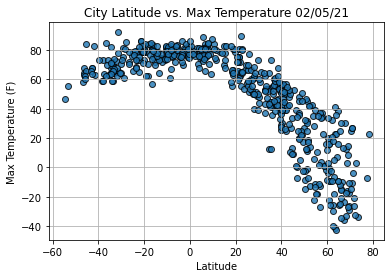

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

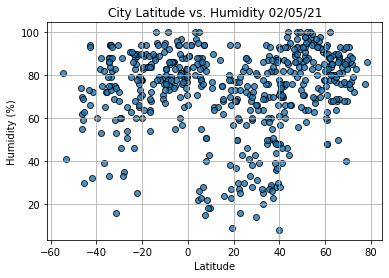

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

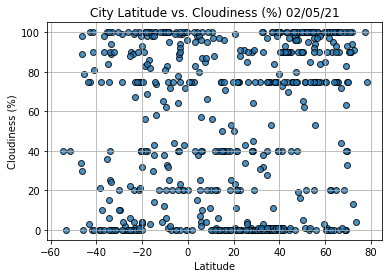

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

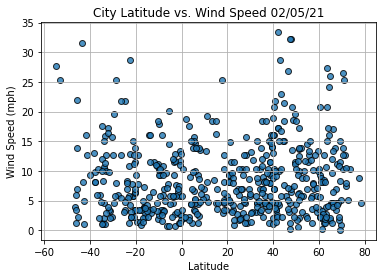

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-02-05 22:23:41
Lat                      -23.1203
Lng                      -134.969
Max Temp                    79.12
Humidity                       68
Cloudiness                      1
Wind Speed                  10.85
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
538     True
539    False
540     True
541    False
542    False
Name: Lat, Length: 543, dtype: bool

In [25]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faya,SA,2021-02-05 22:24:48,18.3851,42.4509,55.40,38,20,12.66
1,Kirkuk,IQ,2021-02-05 22:24:48,35.4681,44.3922,54.12,89,100,8.95
7,Hilo,US,2021-02-05 22:24:49,19.7297,-155.0900,78.80,57,1,5.75
8,Pevek,RU,2021-02-05 22:24:49,69.7008,170.3133,-17.57,85,25,0.87
9,Udalguri,IN,2021-02-05 22:24:49,26.7667,92.1333,60.46,41,0,2.82


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

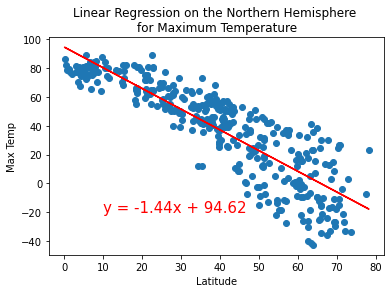

r value = -0.868


In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                        'Max Temp',(10,-20))
result = linregress(x_values, y_values)
print(f"r value = {result.rvalue:.3f}")

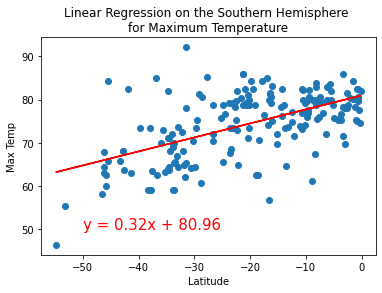

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                        'Max Temp',(-50,50))

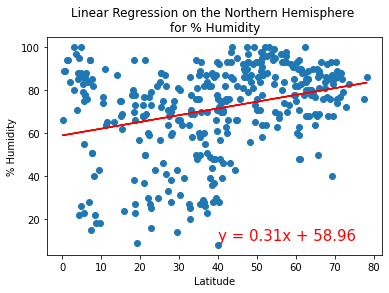

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                        '% Humidity',(40,10))

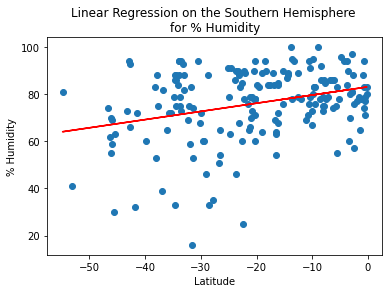

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                        '% Humidity',(-50,10))

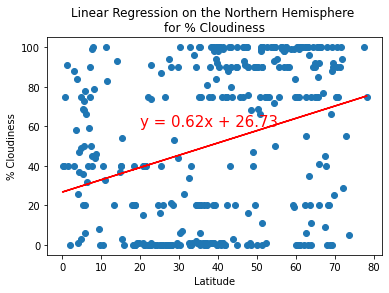

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                        '% Cloudiness',(20,60))


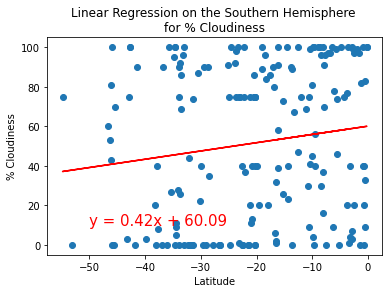

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                        '% Cloudiness',(-50,10))

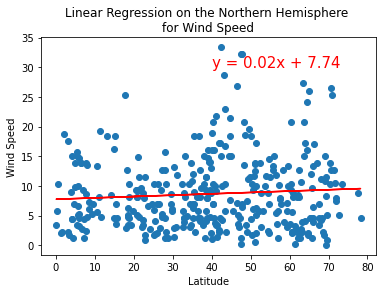

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed',
                        'Wind Speed',(40,30))

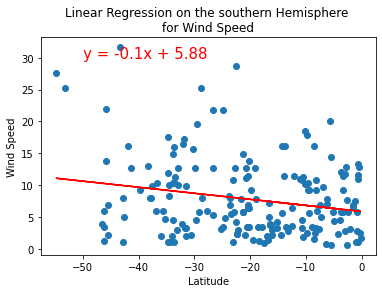

In [81]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \nfor Wind Speed',
                         'Wind Speed',(-50,30))